In [1]:
import sys
import os
from  torch.utils.data import DataLoader
import datetime
sys.path.append('/home/falcon/Desktop/T2P/src/utils')

from utils.plotting_utils import Plot
from utils.plotting_utils import plot_line
from utils.color import ColorPalette
from module.model import T2P
from utils.data import TimeSeriesDataset
from train import train

# T2P

T2P (time-to-pattern) is an interpretable neural network designed to identify informative patterns in time series data. 

This neural network requires several training parameters to be specified, including the window size, which determines the length of the patterns to be learned from a continuous time series data, if they are not already in a specific size. 

The n_patterns parameter specifies the number of patterns the user would like to identify in the data.

T2P also includes several hyperparameters that need to be specified for training: lambda_1, which should be chosen between 0.6-0.9, and lambda_2, which should be chosen between 0.2-0.5.

The location of BinConcrete distribution, referred to as "a", should be set between 0.6-0.8.

Additionally, a learning rate should be specified, ideally between 1e-4 and 1e-3. 

The device parameter specifies the model's training device, which can be set to "cuda" or "cpu". 

Finally, the number of epochs the model needs to learn the pattern should also be specified.

For more detailed information on the T2P neural network and its parameters, please refer to the associated paper

In [2]:
# parameters
window_size = 100
n_patterns = 4
lambda_1 = 0.83
lambda_2 = 0.21
a = 0.8
learning_rate = 1e-3
device = 'cpu'
epochs = 1000

# data file path
data_name='synthetic_90_noise.txt'
file_path = os.getcwd() + f'/data/{data_name}'

# directory to save the result if None the result would not be saved and only depict in the notebook
runId = datetime.datetime.now().isoformat().replace(':', '_')
dn = data_name.split('.')[0]
save_dir = f'{os.getcwd()}/experiments/{dn}/{runId}/'
if save_dir is not None and not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
t2p = T2P(timesteps=window_size, n_patterns=n_patterns, lambda_1=lambda_1, device=device)

In [4]:
dataset = TimeSeriesDataset(file_path, window_size, device)

In [5]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

In [6]:
loss, sparsity = train(
                        epochs,
                        t2p,
                        dataloader,
                        learning_rate,
                        a,
                        lambda_1,
                        lambda_2,
                        device
                     )

##########Start trining##########
Epoch: 000000 | ELBO: 2.205 | Sparsity: 0.012
Epoch: 000001 | ELBO: 2.191 | Sparsity: 0.012
Epoch: 000002 | ELBO: 2.180 | Sparsity: 0.009


/home/falcon/anaconda3/envs/torch9/lib/python3.7/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448224956/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 000003 | ELBO: 2.191 | Sparsity: 0.010
Epoch: 000004 | ELBO: 2.182 | Sparsity: 0.011
Epoch: 000005 | ELBO: 2.154 | Sparsity: 0.008
Epoch: 000006 | ELBO: 2.160 | Sparsity: 0.013
Epoch: 000007 | ELBO: 2.151 | Sparsity: 0.010
Epoch: 000008 | ELBO: 2.149 | Sparsity: 0.013
Epoch: 000009 | ELBO: 2.132 | Sparsity: 0.012
Epoch: 000010 | ELBO: 2.128 | Sparsity: 0.014
Epoch: 000011 | ELBO: 2.142 | Sparsity: 0.010
Epoch: 000012 | ELBO: 2.117 | Sparsity: 0.015
Epoch: 000013 | ELBO: 2.118 | Sparsity: 0.018
Epoch: 000014 | ELBO: 2.113 | Sparsity: 0.010
Epoch: 000015 | ELBO: 2.098 | Sparsity: 0.017
Epoch: 000016 | ELBO: 2.088 | Sparsity: 0.017
Epoch: 000017 | ELBO: 2.100 | Sparsity: 0.023
Epoch: 000018 | ELBO: 2.112 | Sparsity: 0.025
Epoch: 000019 | ELBO: 2.087 | Sparsity: 0.026
Epoch: 000020 | ELBO: 2.096 | Sparsity: 0.034
Epoch: 000021 | ELBO: 2.077 | Sparsity: 0.060
Epoch: 000022 | ELBO: 2.084 | Sparsity: 0.164
Epoch: 000023 | ELBO: 2.088 | Sparsity: 0.239
Epoch: 000024 | ELBO: 2.079 | Spar

Epoch: 000183 | ELBO: 1.670 | Sparsity: 0.698
Epoch: 000184 | ELBO: 1.658 | Sparsity: 0.694
Epoch: 000185 | ELBO: 1.662 | Sparsity: 0.704
Epoch: 000186 | ELBO: 1.658 | Sparsity: 0.698
Epoch: 000187 | ELBO: 1.711 | Sparsity: 0.699
Epoch: 000188 | ELBO: 1.664 | Sparsity: 0.703
Epoch: 000189 | ELBO: 1.658 | Sparsity: 0.706
Epoch: 000190 | ELBO: 1.657 | Sparsity: 0.699
Epoch: 000191 | ELBO: 1.652 | Sparsity: 0.694
Epoch: 000192 | ELBO: 1.712 | Sparsity: 0.665
Epoch: 000193 | ELBO: 1.657 | Sparsity: 0.659
Epoch: 000194 | ELBO: 1.657 | Sparsity: 0.681
Epoch: 000195 | ELBO: 1.664 | Sparsity: 0.702
Epoch: 000196 | ELBO: 1.670 | Sparsity: 0.668
Epoch: 000197 | ELBO: 1.665 | Sparsity: 0.643
Epoch: 000198 | ELBO: 1.670 | Sparsity: 0.701
Epoch: 000199 | ELBO: 1.652 | Sparsity: 0.686
Epoch: 000200 | ELBO: 1.659 | Sparsity: 0.699
Epoch: 000201 | ELBO: 1.670 | Sparsity: 0.700
Epoch: 000202 | ELBO: 1.652 | Sparsity: 0.685
Epoch: 000203 | ELBO: 1.656 | Sparsity: 0.700
Epoch: 000204 | ELBO: 1.658 | Spar

Epoch: 000362 | ELBO: 1.532 | Sparsity: 0.666
Epoch: 000363 | ELBO: 1.542 | Sparsity: 0.652
Epoch: 000364 | ELBO: 1.537 | Sparsity: 0.635
Epoch: 000365 | ELBO: 1.550 | Sparsity: 0.625
Epoch: 000366 | ELBO: 1.539 | Sparsity: 0.646
Epoch: 000367 | ELBO: 1.532 | Sparsity: 0.653
Epoch: 000368 | ELBO: 1.547 | Sparsity: 0.596
Epoch: 000369 | ELBO: 1.527 | Sparsity: 0.636
Epoch: 000370 | ELBO: 1.567 | Sparsity: 0.618
Epoch: 000371 | ELBO: 1.537 | Sparsity: 0.622
Epoch: 000372 | ELBO: 1.556 | Sparsity: 0.634
Epoch: 000373 | ELBO: 1.546 | Sparsity: 0.660
Epoch: 000374 | ELBO: 1.525 | Sparsity: 0.634
Epoch: 000375 | ELBO: 1.530 | Sparsity: 0.611
Epoch: 000376 | ELBO: 1.529 | Sparsity: 0.639
Epoch: 000377 | ELBO: 1.554 | Sparsity: 0.634
Epoch: 000378 | ELBO: 1.561 | Sparsity: 0.602
Epoch: 000379 | ELBO: 1.525 | Sparsity: 0.650
Epoch: 000380 | ELBO: 1.527 | Sparsity: 0.641
Epoch: 000381 | ELBO: 1.526 | Sparsity: 0.655
Epoch: 000382 | ELBO: 1.542 | Sparsity: 0.644
Epoch: 000383 | ELBO: 1.518 | Spar

Epoch: 000542 | ELBO: 1.507 | Sparsity: 0.640
Epoch: 000543 | ELBO: 1.510 | Sparsity: 0.641
Epoch: 000544 | ELBO: 1.526 | Sparsity: 0.609
Epoch: 000545 | ELBO: 1.505 | Sparsity: 0.634
Epoch: 000546 | ELBO: 1.508 | Sparsity: 0.657
Epoch: 000547 | ELBO: 1.533 | Sparsity: 0.612
Epoch: 000548 | ELBO: 1.511 | Sparsity: 0.647
Epoch: 000549 | ELBO: 1.511 | Sparsity: 0.635
Epoch: 000550 | ELBO: 1.506 | Sparsity: 0.638
Epoch: 000551 | ELBO: 1.506 | Sparsity: 0.653
Epoch: 000552 | ELBO: 1.504 | Sparsity: 0.639
Epoch: 000553 | ELBO: 1.506 | Sparsity: 0.652
Epoch: 000554 | ELBO: 1.512 | Sparsity: 0.648
Epoch: 000555 | ELBO: 1.535 | Sparsity: 0.635
Epoch: 000556 | ELBO: 1.511 | Sparsity: 0.655
Epoch: 000557 | ELBO: 1.513 | Sparsity: 0.635
Epoch: 000558 | ELBO: 1.509 | Sparsity: 0.634
Epoch: 000559 | ELBO: 1.509 | Sparsity: 0.638
Epoch: 000560 | ELBO: 1.527 | Sparsity: 0.642
Epoch: 000561 | ELBO: 1.504 | Sparsity: 0.640
Epoch: 000562 | ELBO: 1.508 | Sparsity: 0.641
Epoch: 000563 | ELBO: 1.501 | Spar

Epoch: 000722 | ELBO: 1.500 | Sparsity: 0.647
Epoch: 000723 | ELBO: 1.505 | Sparsity: 0.630
Epoch: 000724 | ELBO: 1.510 | Sparsity: 0.628
Epoch: 000725 | ELBO: 1.516 | Sparsity: 0.611
Epoch: 000726 | ELBO: 1.505 | Sparsity: 0.641
Epoch: 000727 | ELBO: 1.494 | Sparsity: 0.638
Epoch: 000728 | ELBO: 1.506 | Sparsity: 0.642
Epoch: 000729 | ELBO: 1.515 | Sparsity: 0.581
Epoch: 000730 | ELBO: 1.517 | Sparsity: 0.645
Epoch: 000731 | ELBO: 1.501 | Sparsity: 0.636
Epoch: 000732 | ELBO: 1.506 | Sparsity: 0.589
Epoch: 000733 | ELBO: 1.510 | Sparsity: 0.645
Epoch: 000734 | ELBO: 1.505 | Sparsity: 0.654
Epoch: 000735 | ELBO: 1.504 | Sparsity: 0.641
Epoch: 000736 | ELBO: 1.504 | Sparsity: 0.637
Epoch: 000737 | ELBO: 1.506 | Sparsity: 0.630
Epoch: 000738 | ELBO: 1.506 | Sparsity: 0.621
Epoch: 000739 | ELBO: 1.498 | Sparsity: 0.641
Epoch: 000740 | ELBO: 1.500 | Sparsity: 0.632
Epoch: 000741 | ELBO: 1.554 | Sparsity: 0.617
Epoch: 000742 | ELBO: 1.501 | Sparsity: 0.647
Epoch: 000743 | ELBO: 1.510 | Spar

Epoch: 000903 | ELBO: 1.526 | Sparsity: 0.627
Epoch: 000904 | ELBO: 1.506 | Sparsity: 0.591
Epoch: 000905 | ELBO: 1.502 | Sparsity: 0.643
Epoch: 000906 | ELBO: 1.522 | Sparsity: 0.623
Epoch: 000907 | ELBO: 1.506 | Sparsity: 0.618
Epoch: 000908 | ELBO: 1.512 | Sparsity: 0.607
Epoch: 000909 | ELBO: 1.505 | Sparsity: 0.614
Epoch: 000910 | ELBO: 1.498 | Sparsity: 0.647
Epoch: 000911 | ELBO: 1.508 | Sparsity: 0.624
Epoch: 000912 | ELBO: 1.548 | Sparsity: 0.619
Epoch: 000913 | ELBO: 1.515 | Sparsity: 0.596
Epoch: 000914 | ELBO: 1.510 | Sparsity: 0.633
Epoch: 000915 | ELBO: 1.500 | Sparsity: 0.650
Epoch: 000916 | ELBO: 1.539 | Sparsity: 0.613
Epoch: 000917 | ELBO: 1.535 | Sparsity: 0.609
Epoch: 000918 | ELBO: 1.506 | Sparsity: 0.623
Epoch: 000919 | ELBO: 1.520 | Sparsity: 0.624
Epoch: 000920 | ELBO: 1.505 | Sparsity: 0.645
Epoch: 000921 | ELBO: 1.499 | Sparsity: 0.651
Epoch: 000922 | ELBO: 1.499 | Sparsity: 0.644
Epoch: 000923 | ELBO: 1.496 | Sparsity: 0.636
Epoch: 000924 | ELBO: 1.503 | Spar

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_90_noise/2023-03-14T14_38_57.419805/Training Loss.png


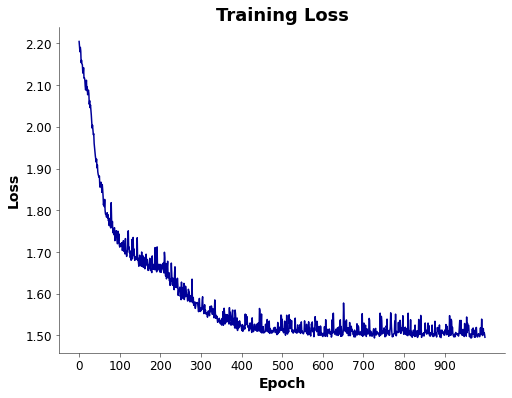

In [7]:
plot_line(loss, save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_90_noise/2023-03-14T14_38_57.419805/Sparsity of z vector.png


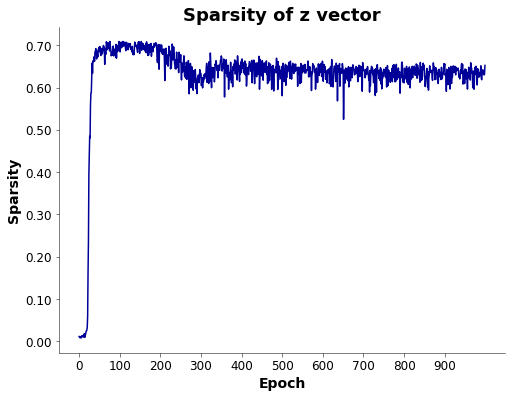

In [8]:
plot_line(sparsity, title='Sparsity of z vector', ylabel='Sparsity', save_dir=save_dir)

In [9]:
t2p.train(False)
patterns = t2p.decoder.weight[:,0].data.cpu().numpy()
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
z_s = list()
alphas = list()
for i, x in enumerate(dataloader): 
    outputs = t2p(x)
    z = t2p.z.data.cpu().numpy()
    z_s.append(z[0,:,:,0,0])
    alphas.append(t2p.alpha.data.cpu().numpy()[0,:,:,0,0])

                
plot = Plot(dataset.get_input(),z_s,alphas,patterns,window_size)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_90_noise/2023-03-14T14_38_57.419805/patterns_analysis.png


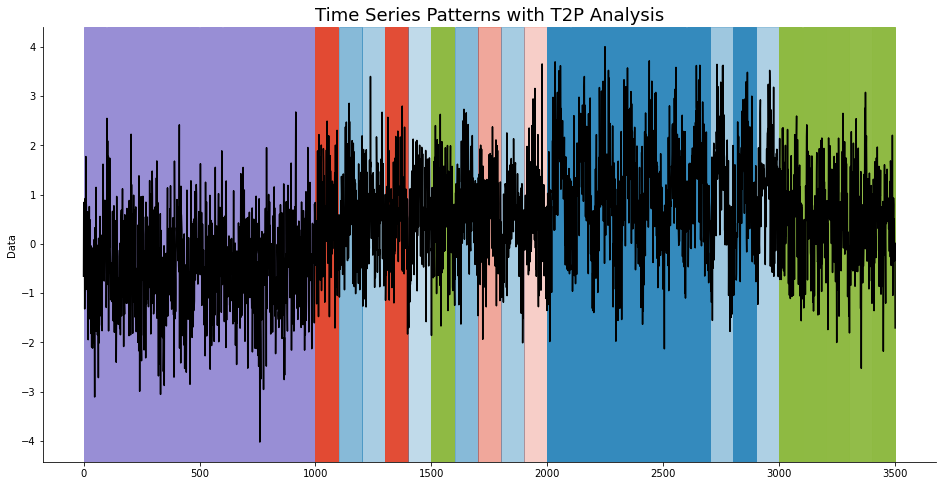

In [10]:
plot.plot_patterns_analysis(save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_90_noise/2023-03-14T14_38_57.419805/patterns.png


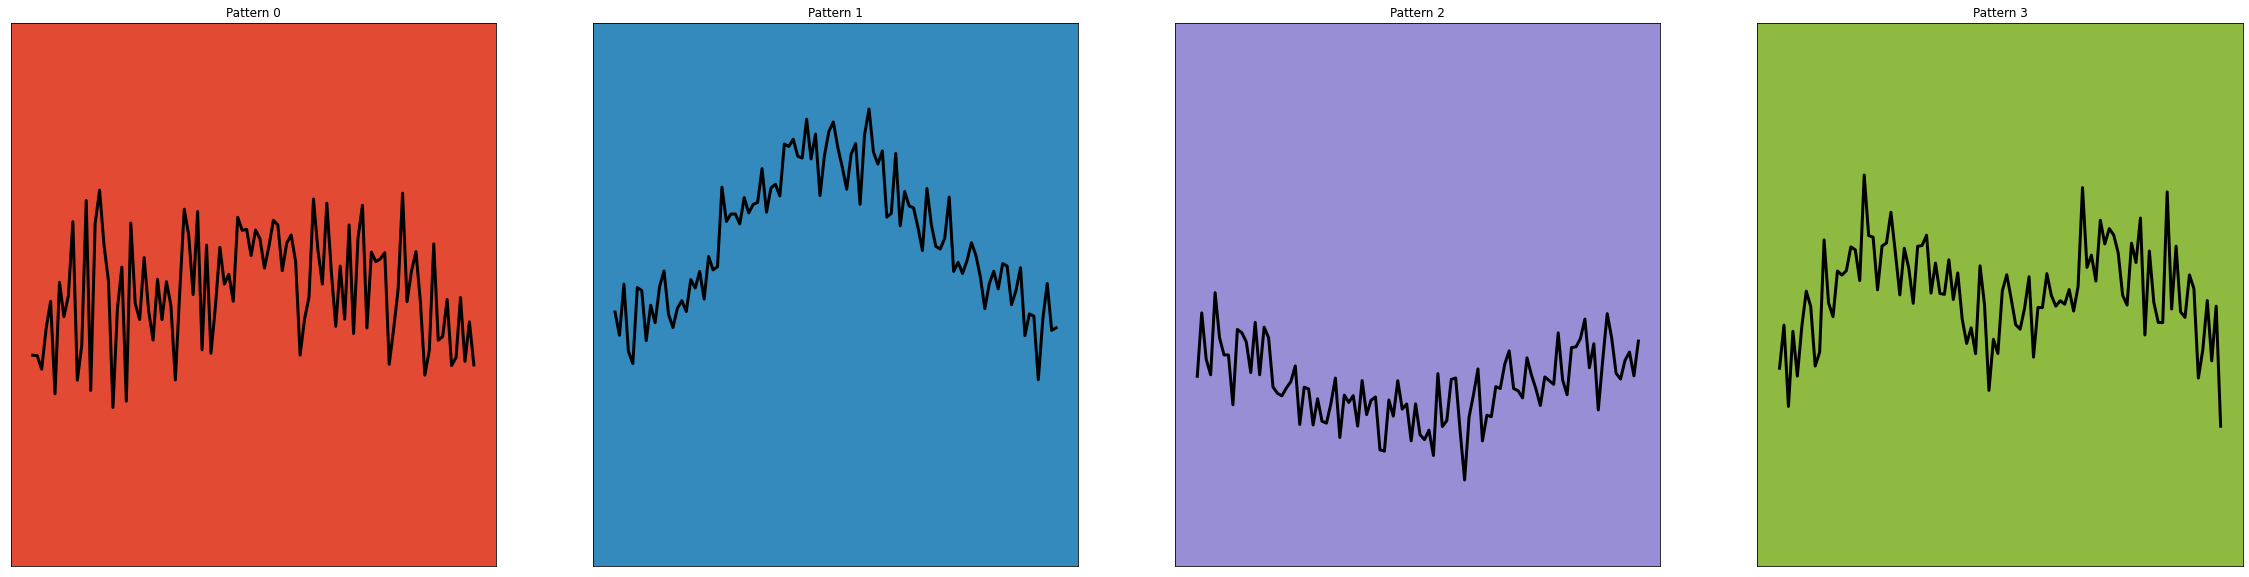

In [11]:
plot.plot_patterns(save_dir)